In [9]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch_geometric
from torch_geometric.data import Data

## Full Addr

In [10]:
# connectivity matrix
full_addr_conn = np.array(
    [
        [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1]
    ]
)
full_addr_conn.shape

(12, 14)

In [11]:
B = nx.Graph()
num_he, num_n = full_addr_conn.shape

B.add_nodes_from(range(0, num_n), bipartite=0)
B.add_nodes_from(range(num_n, num_n+num_he), bipartite=1)

for i in range(full_addr_conn.shape[0]):
    for j in range(full_addr_conn.shape[1]):
        if full_addr_conn[i][j] > 0:
            B.add_edge(i + num_n, j)

new_labels = {i: f'net {i-num_n}' for i in range(num_n, num_n+num_he)}
B = nx.relabel_nodes(B, new_labels)

node_colors = ['red' if B.nodes[node]['bipartite'] == 0 else 'green' for node in B.nodes()]

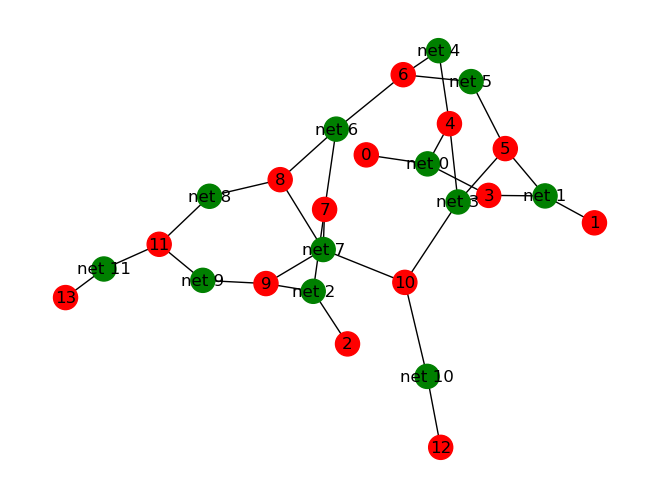

In [12]:
nx.draw(B, with_labels=True, node_color=node_colors)

In [32]:
incidence = nx.incidence_matrix(B, oriented=True)
incidence = torch.tensor(incidence.toarray(), dtype=torch.float)
data = Data(x=None,
            edge_index=None,
            edge_attr=incidence)
data

Data(edge_attr=[26, 32])

## Multi-Bit Addr

In [34]:
mba_conn = np.array(
    [
        [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0]
    ]
)
mba_conn.shape

(15, 16)

In [35]:
G = nx.Graph()
num_he, num_n = mba_conn.shape

G.add_nodes_from(range(0, num_n), bipartite=0)
G.add_nodes_from(range(num_n, num_n+num_he), bipartite=1)

for i in range(mba_conn.shape[0]):
    for j in range(mba_conn.shape[1]):
        if mba_conn[i][j] > 0:
            G.add_edge(i + num_n, j)

new_labels = {i: f'net {i-num_n}' for i in range(num_n, num_n+num_he)}
G = nx.relabel_nodes(G, new_labels)

node_colors = ['red' if G.nodes[node]['bipartite'] == 0 else 'green' for node in G.nodes()]

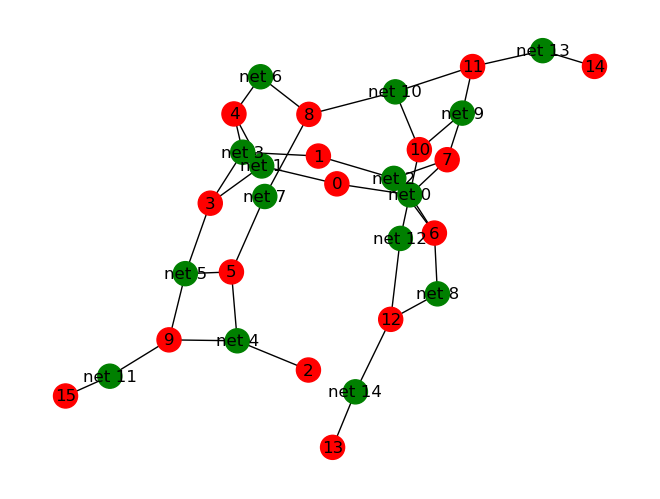

In [36]:
nx.draw(G, with_labels=True, node_color=node_colors)

In [37]:
incidence = nx.incidence_matrix(G, oriented=True)
incidence = torch.tensor(incidence.toarray(), dtype=torch.float)
data = Data(x=None,
            edge_index=None,
            edge_attr=incidence)
data

Data(edge_attr=[31, 38])